<a href="https://colab.research.google.com/github/Usama113m/APPLIED-ARTIFICIAL-INTELLIGENCE-Usama-Ashraf-/blob/main/Personality_Prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  mounting google drive....
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Necessary Libraries

In [ ]:
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC


## Data Exploration

In [ ]:
# Loading the dataset from csv file

file_path = "/content/drive/MyDrive/mbti_1.csv"
df = pd.read_csv(file_path)

# printing the basic information...
print("Dataset shape:", df.shape)
print("\nDataset columns:", df.columns)
print("\nData types:")
print(df.dtypes)

print("\nSample data:")
print(df.head())

# MBTI type distribution
print("\nMBTI Type Counts:")
print(df['type'].value_counts())


Dataset shape: (8675, 2)

Dataset columns: Index(['type', 'posts'], dtype='object')

Data types:
type     object
posts    object
dtype: object

Sample data:
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

MBTI Type Counts:
type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


## Preprocessing & Exploration

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-4-0d343acc3cf8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=top_words_df, palette='magma')


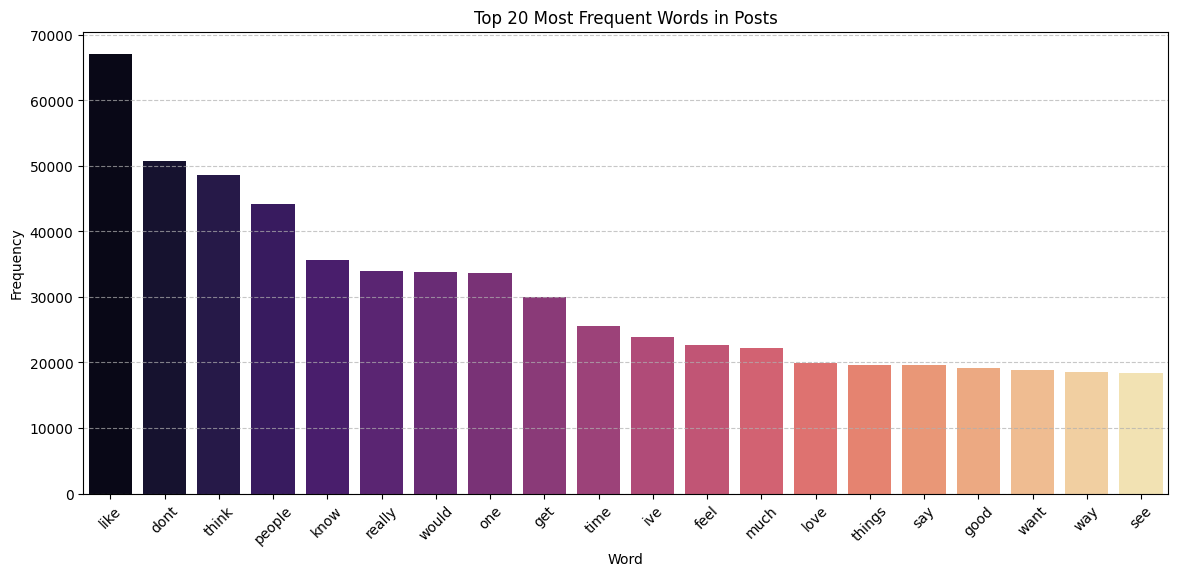

In [ ]:
# Downloading the stopwords to use them for preprocessing....
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Combine all posts into one big string and preprocess..
all_text = " ".join(df['posts'].tolist()).lower()
all_text = re.sub(r"http\S+|www.\S+", "", all_text)  # to remove the URLs
all_text = re.sub(r"\d+", "", all_text)              # removing the numbers or other digits (special characters)
all_text = all_text.translate(str.maketrans('', '', string.punctuation))  # removing the punctuation

# Tokenization and removing the stopwords
words = all_text.split()
words = [word for word in words if word not in stop_words and len(word) > 2]

# just to count the word frequencies
word_counts = Counter(words)
top_words = word_counts.most_common(20)

# Preparing the dataset for plotting
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plotting using matplotlib graphing.....
plt.figure(figsize=(14, 6))
sns.barplot(x='Word', y='Frequency', data=top_words_df, palette='magma')
plt.title("Top 20 Most Frequent Words in Posts")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


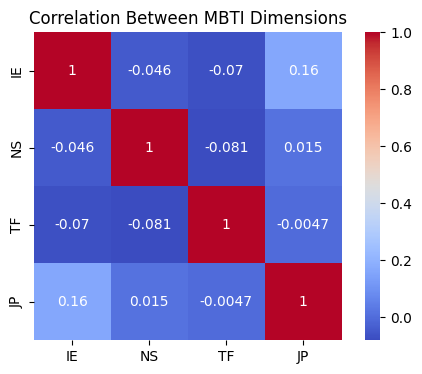

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split MBTI types into binary dimensions
def mbti_to_binary(mbti):
    return {
        'IE': 0 if mbti[0] == 'I' else 1,
        'NS': 0 if mbti[1] == 'N' else 1,
        'TF': 0 if mbti[2] == 'T' else 1,
        'JP': 0 if mbti[3] == 'J' else 1,
    }

# Apply conversion to all rows
binary_df = df['type'].apply(mbti_to_binary).apply(pd.Series)

# Plot heatmap of correlations between dimensions
plt.figure(figsize=(6, 4))
sns.heatmap(binary_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Between MBTI Dimensions")
plt.show()


In [ ]:
stop_words = set(stopwords.words('english'))
#preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # removing the URLs
    text = re.sub(r"http\S+|www.\S+", "", text)
    # removing the numbers....
    text = re.sub(r"\d+", "", text)
    # to remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # tokenization and and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    # Join back into a cleaned string
    return " ".join(tokens)

# Apply preprocessing to the 'posts' column
df['cleaned_posts'] = df['posts'].apply(preprocess_text)

# Preview cleaned text
print(df[['posts', 'cleaned_posts']].head())


                                               posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  'I'm finding the lack of me in these posts ver...   
2  'Good one  _____   https://www.youtube.com/wat...   
3  'Dear INTP,   I enjoyed our conversation the o...   
4  'You're fired.|||That's another silly misconce...   

                                       cleaned_posts  
0  intj moments sportscenter top ten plays pranks...  
1  finding lack posts alarmingsex boring position...  
2  good one course say know thats blessing cursed...  
3  dear intp enjoyed conversation day esoteric ga...  
4  youre firedthats another silly misconception a...  


In [ ]:
# encode MBTI types into numbers
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['type'])

# saving label classes (optional, useful for inference later)
label_classes = label_encoder.classes_
print("MBTI classes:", list(label_classes))


MBTI classes: ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']


In [ ]:
X = df['cleaned_posts']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Initialize TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit on training data and transform both train/test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


## Model Training

Model: Logistic Regression

In [ ]:

# Initialize and train
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_classes))


# Save model and vectorizer
joblib.dump(model, 'mbti_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model, vectorizer, and label encoder saved!")


Accuracy: 0.6144092219020173

Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.62      0.13      0.22        38
        ENFP       0.70      0.54      0.61       135
        ENTJ       0.60      0.20      0.30        46
        ENTP       0.63      0.53      0.57       137
        ESFJ       1.00      0.11      0.20         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.61      0.71      0.66       294
        INFP       0.57      0.84      0.68       366
        INTJ       0.62      0.63      0.62       218
        INTP       0.65      0.80      0.72       261
        ISFJ       0.50      0.09      0.15        33
        ISFP       0.78      0.26      0.39        54
        ISTJ       0.67      0.10      0.17        41
        ISTP       0.62      0.36      0.45        67

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model, vectorizer, and label encoder saved!


Model: SVM

In [ ]:
# Initialize and train the SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))


SVM Accuracy: 0.590778097982709

SVM Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.60      0.32      0.41        38
        ENFP       0.62      0.56      0.59       135
        ENTJ       0.47      0.37      0.41        46
        ENTP       0.50      0.50      0.50       137
        ESFJ       1.00      0.33      0.50         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       1.00      0.12      0.22         8
        ESTP       0.55      0.33      0.41        18
        INFJ       0.60      0.65      0.62       294
        INFP       0.61      0.72      0.66       366
        INTJ       0.55      0.59      0.57       218
        INTP       0.63      0.68      0.65       261
        ISFJ       0.59      0.39      0.47        33
        ISFP       0.54      0.41      0.46        54
        ISTJ       0.58      0.34      0.43        41
        ISTP       0.60      0.49      0.54        67

    accuracy       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import joblib
# saving in a dump format.....
joblib.dump(svm_model, 'mbti_svm_model.pkl')
print("SVM model saved!")


SVM model saved!


## Testing the trained Models

Model: Logistic Regression

In [ ]:
import joblib
import re
import string
from nltk.corpus import stopwords

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

def predict_mbti(user_text):
    # Preprocess
    cleaned = preprocess_text(user_text)

    # Vectorize
    vect_text = vectorizer.transform([cleaned])

    # Predict
    pred_label = model.predict(vect_text)[0]

    # Decode label
    mbti_type = label_encoder.inverse_transform([pred_label])[0]

    return mbti_type

# Load previously saved objects
model = joblib.load('mbti_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')
label_encoder = joblib.load('label_encoder.pkl')
stop_words = set(stopwords.words('english'))


In [ ]:
user_input = "I love spending time alone and reflecting on deep philosophical ideas. Social events tire me out."
predicted_type = predict_mbti(user_input)

print("Predicted MBTI Type (Logistic Regression):", predicted_type)


Predicted MBTI Type (Logistic Regression): INTP


Model: SVM

In [ ]:
import re
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def predict_mbti_svm(user_text):
    # Preprocess
    cleaned = preprocess_text(user_text)

    # Vectorize
    vect_text = vectorizer.transform([cleaned])

    # Predict
    pred_label = svm_model.predict(vect_text)[0]

    # Decode label
    mbti_type = label_encoder.inverse_transform([pred_label])[0]

    return mbti_type

ser_input = "I love spending time alone and reflecting on deep philosophical ideas. Social events tire me out."
predicted_type = predict_mbti_svm(user_input)

print("Predicted MBTI Type (SVM):", predicted_type)



Predicted MBTI Type (SVM): INTP


## Performance Analysis & Plotting

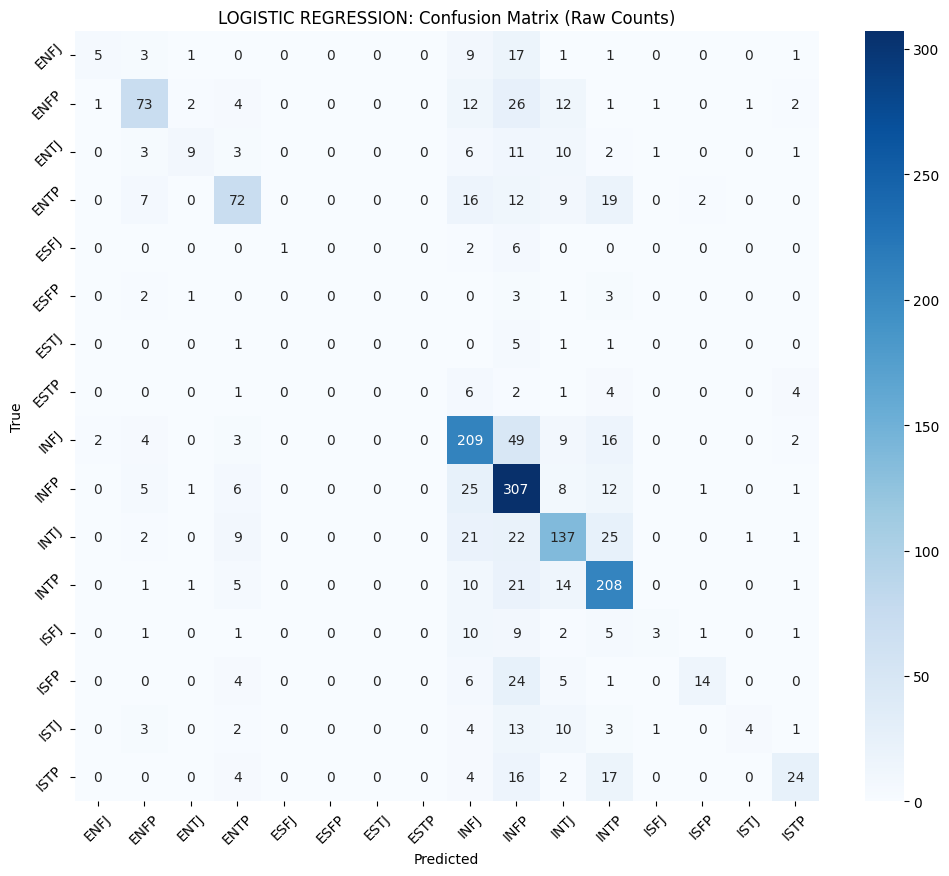

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import numpy as np

# Generating a confusion matrix (testing with raw data)
cm = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("LOGISTIC REGRESSION: Confusion Matrix (Raw Counts)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


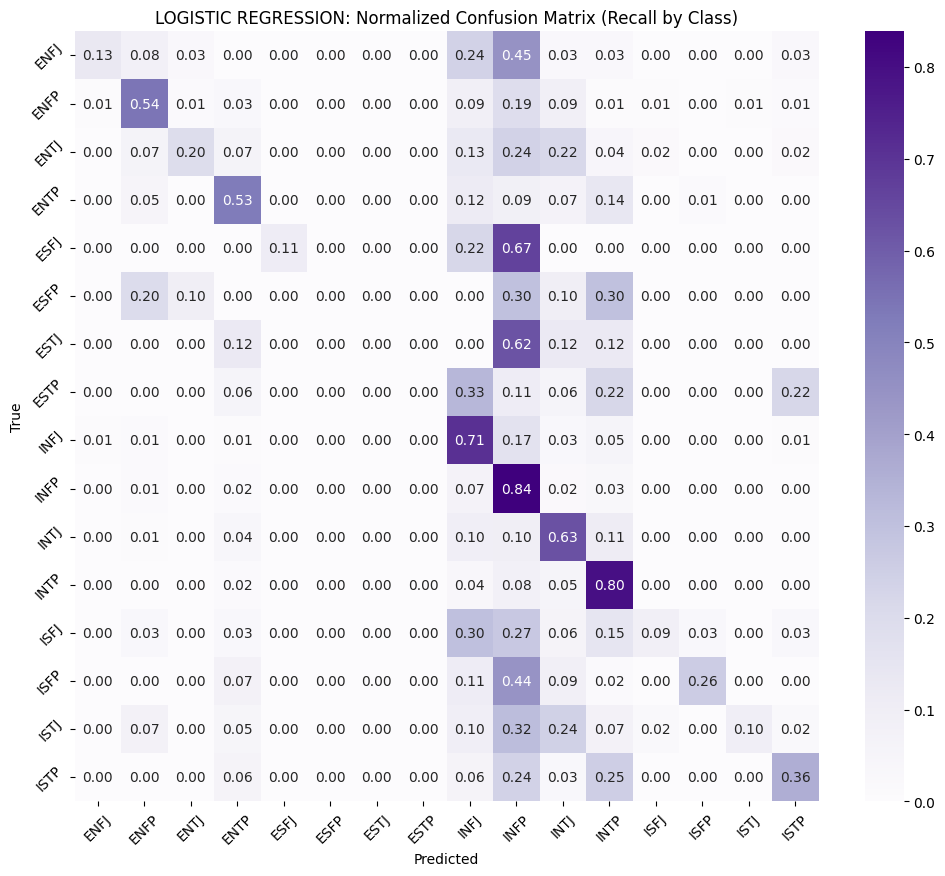

In [ ]:
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title("LOGISTIC REGRESSION: Normalized Confusion Matrix (Recall by Class)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


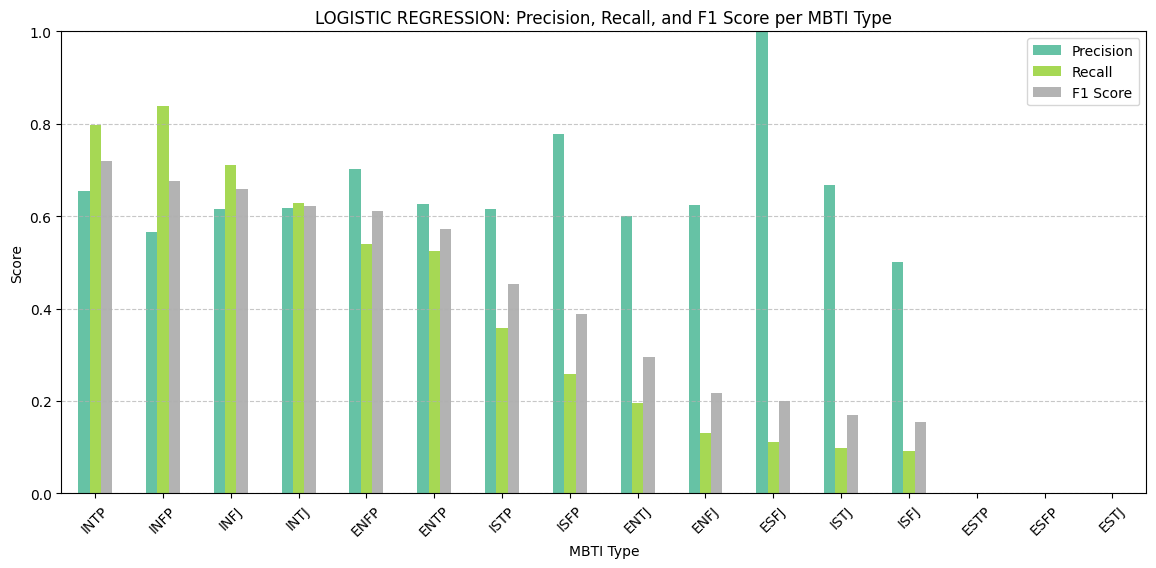

In [ ]:
# Get per-class metrics
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, zero_division=0)

# Wrap into DataFrame
metrics_df = pd.DataFrame({
    'MBTI Type': labels,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1
}).sort_values(by='F1 Score', ascending=False)

# plotting....
metrics_df.set_index("MBTI Type")[["Precision", "Recall", "F1 Score"]].plot(kind='bar', figsize=(14,6), colormap='Set2')
plt.title("LOGISTIC REGRESSION: Precision, Recall, and F1 Score per MBTI Type")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# getting top 10 off-diagonal confusions
cm_copy = cm.copy()
np.fill_diagonal(cm_copy, 0)

# getting top 10 misclassifications
mis_idx = np.dstack(np.unravel_index(np.argsort(cm_copy.ravel())[-10:], cm_copy.shape))[0]

print("LOGISTIC REGRESSION: Top 10 Misclassifications:")
for i, j in mis_idx[::-1]:
    print(f"{labels[i]} → {labels[j]}: {cm[i, j]} times")


LOGISTIC REGRESSION: Top 10 Misclassifications:
INFJ → INFP: 49 times
ENFP → INFP: 26 times
INFP → INFJ: 25 times
INTJ → INTP: 25 times
ISFP → INFP: 24 times
INTJ → INFP: 22 times
INTJ → INFJ: 21 times
INTP → INFP: 21 times
ENTP → INTP: 19 times
ENFJ → INFP: 17 times


Plotting: SVM

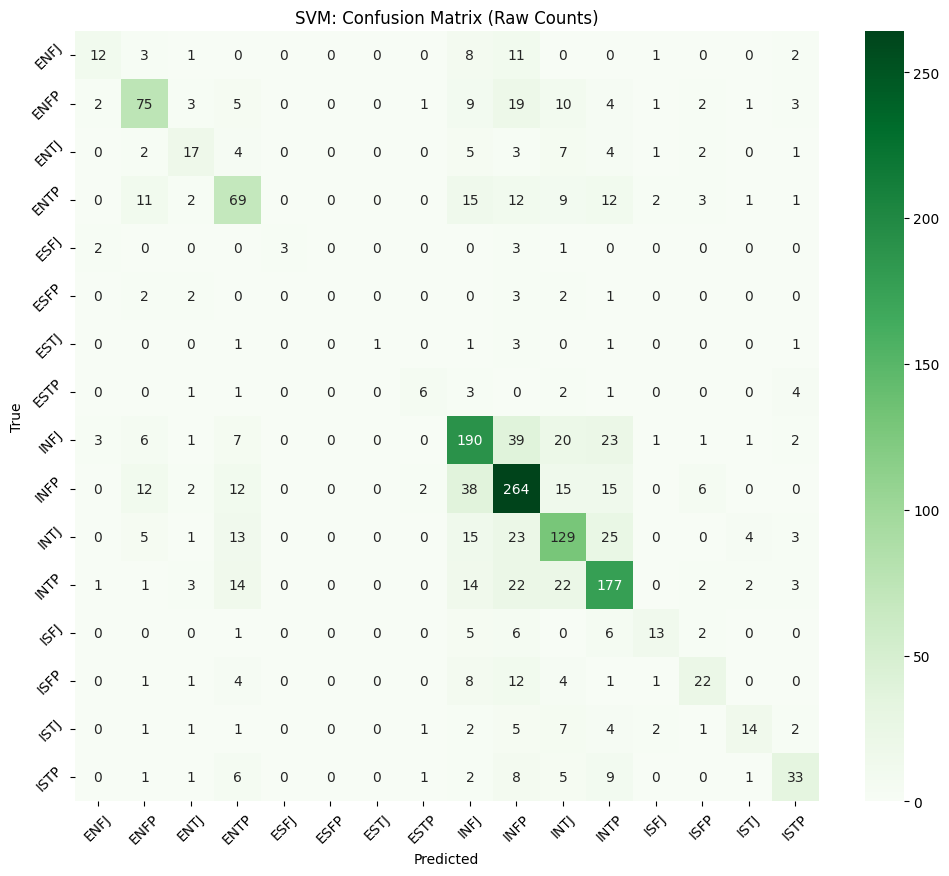

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_test, y_pred_svm)
labels = label_encoder.classes_

plt.figure(figsize=(12, 10))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("SVM: Confusion Matrix (Raw Counts)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


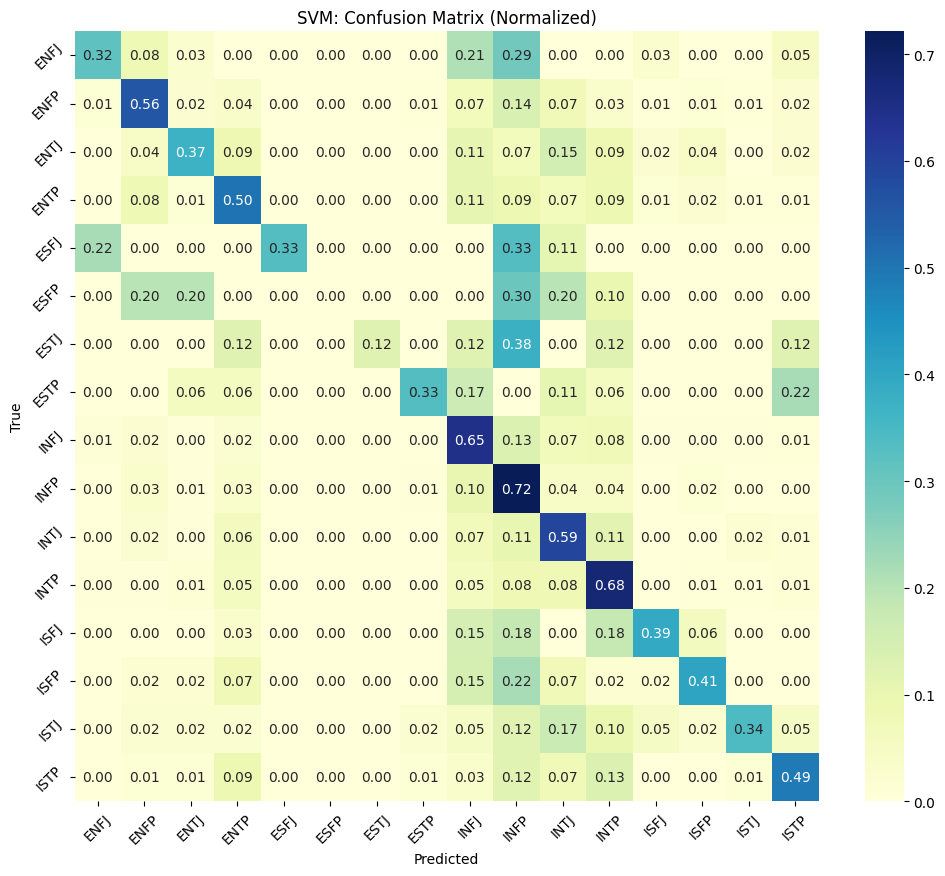

In [ ]:
cm_svm_norm = confusion_matrix(y_test, y_pred_svm, normalize='true')

plt.figure(figsize=(12, 10))
sns.heatmap(cm_svm_norm, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title("SVM: Confusion Matrix (Normalized)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


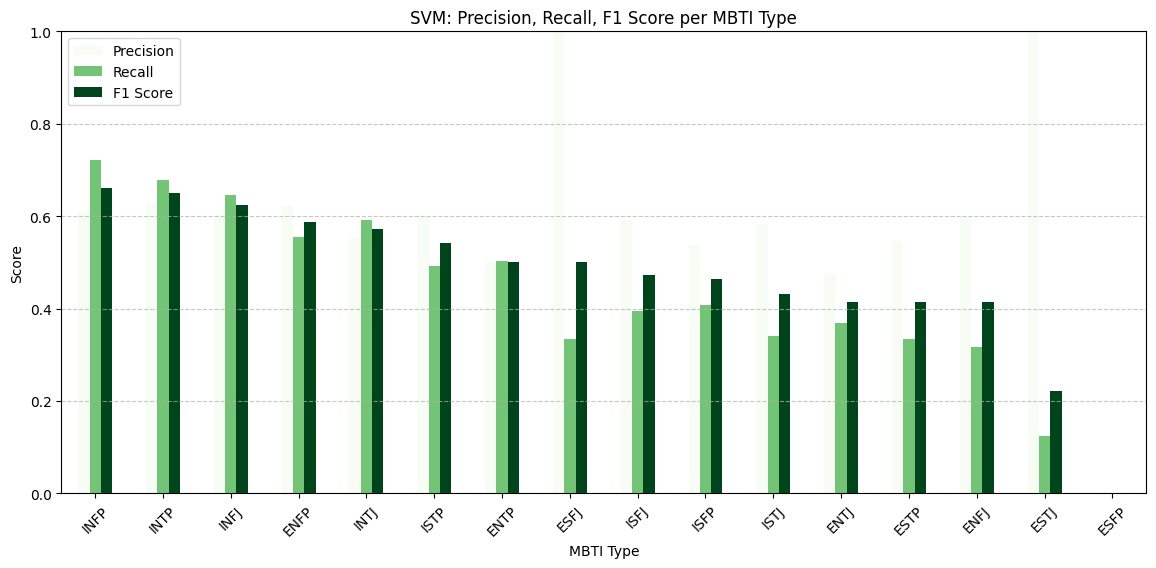

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

prec_svm, rec_svm, f1_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, zero_division=0)

svm_metrics_df = pd.DataFrame({
    'MBTI Type': labels,
    'Precision': prec_svm,
    'Recall': rec_svm,
    'F1 Score': f1_svm
}).sort_values(by='F1 Score', ascending=False)

svm_metrics_df.set_index("MBTI Type")[["Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(14,6), colormap='Greens'
)
plt.title("SVM: Precision, Recall, F1 Score per MBTI Type")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


Comparative Analysis

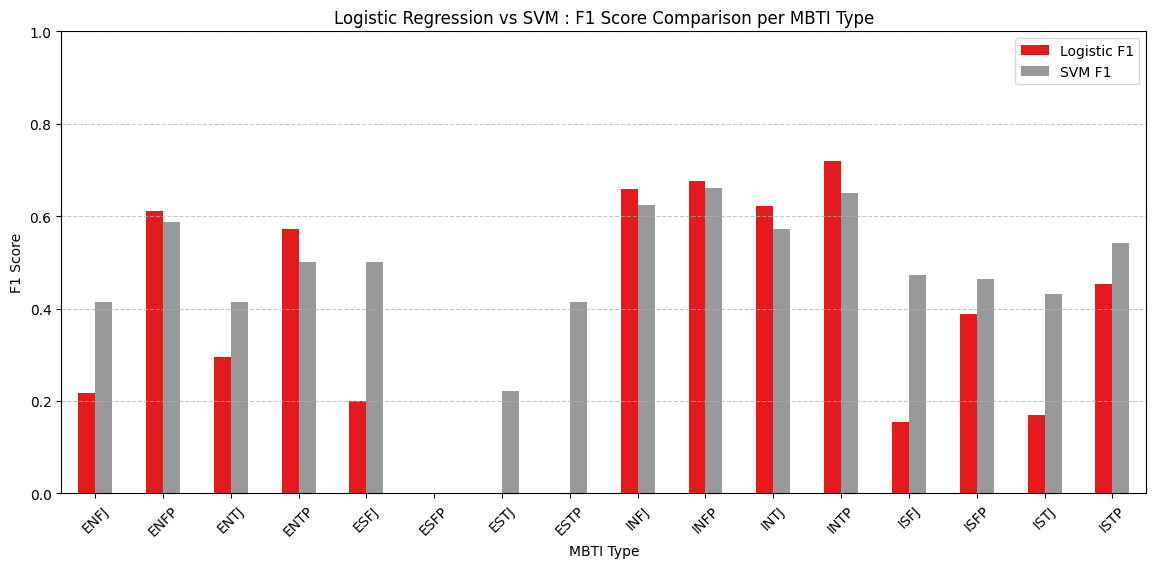

In [ ]:
# Metrics for logistic regression (if not already saved)
prec_lr, rec_lr, f1_lr, _ = precision_recall_fscore_support(y_test, y_pred, zero_division=0)

# Combine into one DataFrame
compare_df = pd.DataFrame({
    'MBTI Type': labels,
    'Logistic F1': f1_lr,
    'SVM F1': f1_svm
})

compare_df.set_index("MBTI Type")[["Logistic F1", "SVM F1"]].plot(
    kind='bar', figsize=(14,6), colormap='Set1'
)
plt.title("Logistic Regression vs SVM : F1 Score Comparison per MBTI Type")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


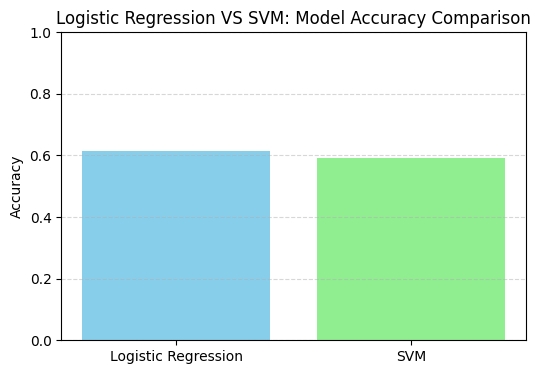

In [ ]:
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, y_pred)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Bar plot
plt.figure(figsize=(6,4))
plt.bar(['Logistic Regression', 'SVM'], [acc_lr, acc_svm], color=['skyblue', 'lightgreen'])
plt.title("Logistic Regression VS SVM: Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
